In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


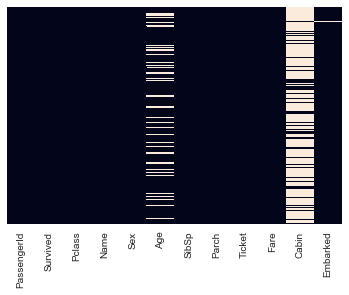

In [4]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False)

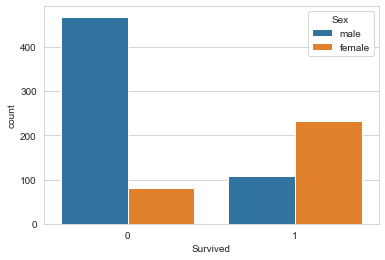

In [5]:
sns.countplot(x='Survived', data=train, hue='Sex')

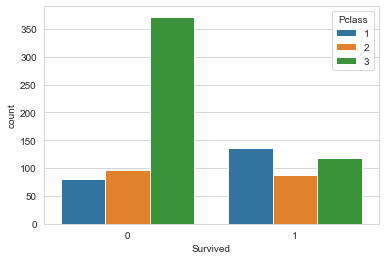

In [6]:
sns.countplot(x='Survived', hue='Pclass', data=train)

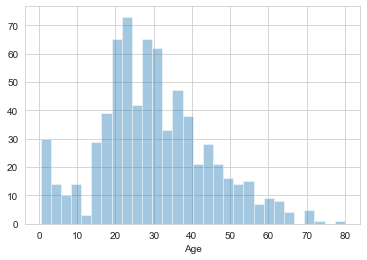

In [7]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [8]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [9]:
def getTitle(string):
    #We want to get just the title.
    return string.split(',')[1].split('.')[0]

train['Title'] = train['Name'].apply(getTitle)
train.drop('Name', axis=1, inplace=True)

In [10]:
#Here we get the means of the classes to fill in the missing age values.
firstMean = train[train['Pclass'] == 1]['Age'].mean()
secondMean = train[train['Pclass'] == 2]['Age'].mean()
thirdMean = train[train['Pclass'] == 3]['Age'].mean()

In [11]:
def fillInAge(columns):
    #This indexing only works when indexing a row
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return float(int(firstMean))
        elif Pclass == 2:
            return float(int(secondMean))
        elif Pclass == 3:
            return float(int(thirdMean))
    else:
        return Age

train['Age'] = train[['Age', 'Pclass']].apply(fillInAge, axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


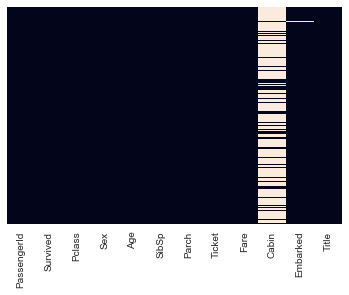

In [12]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False)

In [13]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
title = pd.get_dummies(train['Title'], drop_first=True)
train.drop(['Sex', 'Embarked', 'Title'], axis=1, inplace=True)
train = pd.concat([train,sex,embark, title],axis=1)

In [14]:
train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,22.0,1,0,7.2500,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [15]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [17]:
logModel.fit(X_train, y_train)

C:\Users\Manuel Santana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
logPred = logModel.predict(X_test)
print('Reports of Logistic Model')
print(classification_report(y_test, logPred))
print('\n')
print(confusion_matrix(y_test, logPred))

Reports of Logistic Model
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       119
           1       0.88      0.63      0.74       104

    accuracy                           0.79       223
   macro avg       0.81      0.78      0.78       223
weighted avg       0.81      0.79      0.78       223



[[110   9]
 [ 38  66]]


In [21]:
#Now we try the random forrest method on the same train test split
from sklearn.ensemble import RandomForestClassifier
titForr = RandomForestClassifier()
titForr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
forrPred = titForr.predict(X_test)

In [23]:
print('Report for Random Forrest Method')
print(classification_report(y_test, forrPred))
print('\n')
print(confusion_matrix(y_test, forrPred))

Report for Random Forrest Method
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       119
           1       0.88      0.70      0.78       104

    accuracy                           0.82       223
   macro avg       0.83      0.81      0.81       223
weighted avg       0.83      0.82      0.81       223



[[109  10]
 [ 31  73]]
